In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import rasterio as rio
from rasterio.warp import reproject
import glob

In [2]:
data_path = r'F:/GruV-Net/data/temperature/'
dst_path = data_path+'GTiff/'

In [3]:
files = glob.glob(data_path+'raw/2008-2012/*.asc')

In [4]:
ref = rio.open(data_path+r'ref_raster.tif')

for f in files:
    src = rio.open(f, mode='r+')
    src.crs = rio.crs.CRS.from_epsg(31467)
    dst = rio.open(dst_path+os.path.basename(f)[:-4]+'.tif', mode='w', driver='GTiff', height=ref.height, width=ref.width, count=1, dtype=ref.dtypes[0], crs=ref.crs, transform=ref.transform)
    reproject(rio.band(src, 1), rio.band(dst, 1))
    src.close()
    dst.close()

---

In [89]:
src = rio.open(data_path+r'test/TAMM_01_2013_01.asc', mode='r+')

In [90]:
src.crs = rio.crs.CRS.from_epsg(31467)

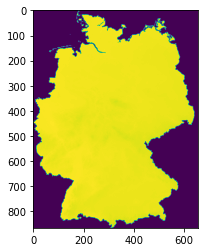

In [91]:
plt.imshow(src.read(1))

In [9]:
ref = rio.open(data_path+r'test/ref_raster.tif')

In [93]:
dst = rio.open(data_path+r'test/cropped.tif', mode='w', driver='GTiff', height=ref.height, width=ref.width, count=1, dtype=ref.dtypes[0], crs=ref.crs, transform=ref.transform)

In [94]:
reproject(rio.band(src, 1), rio.band(dst, 1))

(Band(ds=<open DatasetWriter name='F:/GruV-Net/data/temperature/test/cropped2.tif' mode='w'>, bidx=1, dtype='float32', shape=(252, 142)),
 None)

In [95]:
dst.close()
src.close()
ref.close()